<div align="center">
  <img src="https://github.com/open-mmlab/mmdetection/raw/3.x/resources/mmdet-logo.png" width="600"/>
  <div>&nbsp;</div>
  <div align="center">
    <b><font size="5">OpenMMLab website</font></b>
    <sup>
      <a href="https://openmmlab.com">
        <i><font size="4">HOT</font></i>
      </a>
    </sup>
    &nbsp;&nbsp;&nbsp;&nbsp;
    <b><font size="5">OpenMMLab platform</font></b>
    <sup>
      <a href="https://platform.openmmlab.com">
        <i><font size="4">TRY IT OUT</font></i>
      </a>
    </sup>
  </div>
  <div>&nbsp;</div>

<a href="https://colab.research.google.com/github/open-mmlab/mmdetection/blob/dev-3.x/demo/inference_demo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

[![PyPI](https://img.shields.io/pypi/v/mmdet)](https://pypi.org/project/mmdet)
[![docs](https://img.shields.io/badge/docs-latest-blue)](https://mmdetection.readthedocs.io/en/latest/)
[![badge](https://github.com/open-mmlab/mmdetection/workflows/build/badge.svg)](https://github.com/open-mmlab/mmdetection/actions)
[![codecov](https://codecov.io/gh/open-mmlab/mmdetection/branch/master/graph/badge.svg)](https://codecov.io/gh/open-mmlab/mmdetection)
[![license](https://img.shields.io/github/license/open-mmlab/mmdetection.svg)](https://github.com/open-mmlab/mmdetection/blob/master/LICENSE)
[![open issues](https://isitmaintained.com/badge/open/open-mmlab/mmdetection.svg)](https://github.com/open-mmlab/mmdetection/issues)
[![issue resolution](https://isitmaintained.com/badge/resolution/open-mmlab/mmdetection.svg)](https://github.com/open-mmlab/mmdetection/issues)

[📘Documentation](https://mmdetection.readthedocs.io/en/3.x/) |
[🛠️Installation](https://mmdetection.readthedocs.io/en/3.x/get_started.html) |
[👀Model Zoo](https://mmdetection.readthedocs.io/en/3.x/model_zoo.html) |
[🆕Update News](https://mmdetection.readthedocs.io/en/3.x/notes/changelog.html) |
[🚀Ongoing Projects](https://github.com/open-mmlab/mmdetection/projects) |
[🤔Reporting Issues](https://github.com/open-mmlab/mmdetection/issues/new/choose)

</div>

<div align="center">
  <a href="https://openmmlab.medium.com/" style="text-decoration:none;">
    <img src="https://user-images.githubusercontent.com/25839884/219255827-67c1a27f-f8c5-46a9-811d-5e57448c61d1.png" width="3%" alt="" /></a>
  <img src="https://user-images.githubusercontent.com/25839884/218346358-56cc8e2f-a2b8-487f-9088-32480cceabcf.png" width="3%" alt="" />
  <a href="https://discord.com/channels/1037617289144569886/1046608014234370059" style="text-decoration:none;">
    <img src="https://user-images.githubusercontent.com/25839884/218347213-c080267f-cbb6-443e-8532-8e1ed9a58ea9.png" width="3%" alt="" /></a>
  <img src="https://user-images.githubusercontent.com/25839884/218346358-56cc8e2f-a2b8-487f-9088-32480cceabcf.png" width="3%" alt="" />
  <a href="https://twitter.com/OpenMMLab" style="text-decoration:none;">
    <img src="https://user-images.githubusercontent.com/25839884/218346637-d30c8a0f-3eba-4699-8131-512fb06d46db.png" width="3%" alt="" /></a>
  <img src="https://user-images.githubusercontent.com/25839884/218346358-56cc8e2f-a2b8-487f-9088-32480cceabcf.png" width="3%" alt="" />
  <a href="https://www.youtube.com/openmmlab" style="text-decoration:none;">
    <img src="https://user-images.githubusercontent.com/25839884/218346691-ceb2116a-465a-40af-8424-9f30d2348ca9.png" width="3%" alt="" /></a>
  <img src="https://user-images.githubusercontent.com/25839884/218346358-56cc8e2f-a2b8-487f-9088-32480cceabcf.png" width="3%" alt="" />
  <a href="https://space.bilibili.com/1293512903" style="text-decoration:none;">
    <img src="https://user-images.githubusercontent.com/25839884/219026751-d7d14cce-a7c9-4e82-9942-8375fca65b99.png" width="3%" alt="" /></a>
  <img src="https://user-images.githubusercontent.com/25839884/218346358-56cc8e2f-a2b8-487f-9088-32480cceabcf.png" width="3%" alt="" />
  <a href="https://www.zhihu.com/people/openmmlab" style="text-decoration:none;">
    <img src="https://user-images.githubusercontent.com/25839884/219026120-ba71e48b-6e94-4bd4-b4e9-b7d175b5e362.png" width="3%" alt="" /></a>
</div>

# Inferencer

In this tutorial, you will learn how to perform inference with a MMDetection `DetInferencer`.

Let's start!

```{note}
The commands in this tutorial are mainly for Colab.
You can click the button above, `Open in Colab`, to run this notebook in Colab.
```

## Install MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

In [ ]:
# install dependencies
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git -b dev-3.x
%cd mmdetection

%pip install -e .

In [ ]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

## `DetInferencer`

### Basic Usage

We use the high-level API `DetInferencer` implemented in the MMDetection. This API is created to ease the inference process. The details of the codes can be found [here](https://github.com/open-mmlab/mmdetection/blob/dev-3.x/mmdet/apis/det_inferencer.py).

In [ ]:
from mmdet.apis import DetInferencer

# Initialize the DetInferencer
inferencer = DetInferencer('rtmdet_tiny_8xb32-300e_coco')

# Perform inference
inferencer('demo.jpg', out_dir='./output')

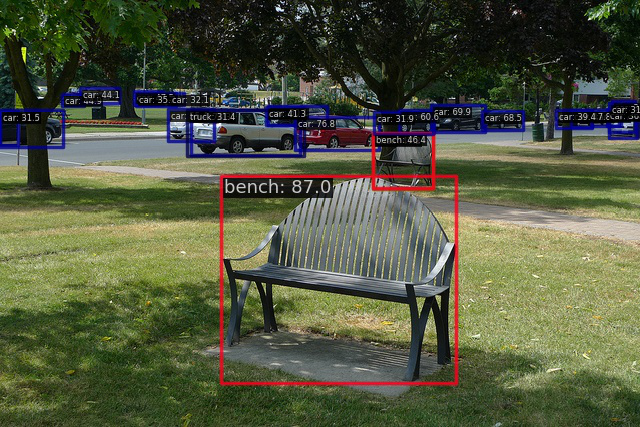

In [4]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

### Initialization

Each Inferencer must be initialized with a model. You can also choose the inference device during initialization.

#### Model Initialization

- To infer with MMDetection's pre-trained model, passing its name to the argument `model` can work. The weights will be automatically downloaded and loaded from OpenMMLab's model zoo.

In [ ]:
inferencer = DetInferencer(model='rtmdet_tiny_8xb32-300e_coco')

There is a very easy to list all model names in MMDetection.

In [ ]:
# models is a list of model names, and them will print automatically
models = DetInferencer.list_models('mmdet')

You can load another weight by passing its path/url to `weights`.

In [ ]:
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

In [ ]:
# Setup a checkpoint file to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Initialize the DetInferencer
inferencer = DetInferencer(model='rtmdet_tiny_8xb32-300e_coco', weights=checkpoint)

- To load custom config and weight, you can pass the path to the config file to `model` and the path to the weight to `weights`.

In [ ]:
# Choose to use a config
config_path = './configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py'

# Setup a checkpoint file to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Initialize the DetInferencer
inferencer = DetInferencer(model=config_path, weights=checkpoint)

- By default, [MMEngine](https://github.com/open-mmlab/mmengine/) dumps config to the weight. If you have a weight trained on MMEngine, you can also pass the path to the weight file to `weights` without specifying `model`:

In [ ]:
# It will raise an error if the config file cannot be found in the weight. Currently, within the MMDetection model repository, only the weights of ddq-detr-4scale_r50 can be loaded in this manner.
inferencer = DetInferencer(weights='https://download.openmmlab.com/mmdetection/v3.0/ddq/ddq-detr-4scale_r50_8xb2-12e_coco/ddq-detr-4scale_r50_8xb2-12e_coco_20230809_170711-42528127.pth')

- Passing config file to `model` without specifying `weight` will result in a randomly initialized model.

### Device

Each Inferencer instance is bound to a device.
By default, the best device is automatically decided by [MMEngine](https://github.com/open-mmlab/mmengine/). You can also alter the device by specifying the `device` argument. For example, you can use the following code to create an Inferencer on GPU 0.

In [ ]:
inferencer = DetInferencer(model='rtmdet_tiny_8xb32-300e_coco', device='cuda:0')

To create an Inferencer on CPU:

In [ ]:
inferencer = DetInferencer(model='rtmdet_tiny_8xb32-300e_coco', device='cpu')

### Inference

Once the Inferencer is initialized, you can directly pass in the raw data to be inferred and get the inference results from return values.

#### Input

Input can be either of these types:

- str: Path/URL to the image.

In [ ]:
inferencer = DetInferencer(model='rtmdet_tiny_8xb32-300e_coco', device='cuda:0')
inferencer('demo/demo.jpg')

- array: Image in numpy array. It should be in BGR order.

In [ ]:
import mmcv
array = mmcv.imread('demo/demo.jpg')
inferencer(array)

- list: A list of basic types above. Each element in the list will be processed separately.

In [ ]:
inferencer(['tests/data/color.jpg', 'tests/data/gray.jpg'])
# You can even mix the types
inferencer(['tests/data/color.jpg', array])

- str: Path to the directory. All images in the directory will be processed.

In [ ]:
inferencer('tests/data/')

### Output

By default, each `Inferencer` returns the prediction results in a dictionary format.

- `visualization` contains the visualized predictions.

- `predictions` contains the predictions results in a json-serializable format. But it's an empty list by default unless `return_vis=True`.

In [ ]:
# Show the structure of result dict
from rich.pretty import pprint

result = inferencer('demo/demo.jpg')
pprint(result, max_length=4)

If you wish to get the raw outputs from the model, you can set `return_datasamples` to `True` to get the original `DataSample`, which will be stored in `predictions`.

In [ ]:
result = inferencer('demo/demo.jpg', return_datasamples=True)
pprint(result, max_length=4)

#### Dumping Results

Apart from obtaining predictions from the return value, you can also export the predictions/visualizations to files by setting `out_dir` and `no_save_pred`/`no_save_vis` arguments.

In [ ]:
inferencer('demo/demo.jpg', out_dir='outputs/', no_save_pred=False)